# EDA

In [14]:
import sys
sys.path.insert(1, r'..\\src')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from preprocessing.preprocess_data import preprocess_datasets
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# paths
dataset_path = r'..\\data\\raw'
filepath = r"..\\results\\figures\\FRU"
logpath = r"..\\results\\logs\\FRU"

# random states to create data samples
np.random.seed(42)
random_states = np.random.randint(0,1000,5) 

In [ ]:
sns.set()
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 7} 
sns.set_context(font_scale=1.4) # , rc=paper_rc, 'paper'

font = {'family' : 'Times New Roman',
        'size'   : 18}
plt.rc('font', **font)

In [6]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [7]:
# choose dataset
datasets = ['german.data', 'BROWARD_CLEAN.csv', 'titanic.csv', 'diabetes.csv', 'bank_r.csv',
            'adult.data', 'lawschool.csv', 'acsincome.pkl', 'acspubliccoverage.pkl', 
            'acsemployment.pkl']
dataset = 'german.data'

# load dataset
df, df_num, metadata, num, binarized_prot  = preprocess_datasets(dataset, path=dataset_path).preprocess_dataset()

In [ ]:
# compute t-sne
dftsne = df_num[[col for col in df_num.columns if col not in metadata['target']]]
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(dftsne.values)
dftsne = pd.DataFrame(X_embedded, columns=['Dimension '+str(dim) for dim in range(X_embedded.shape[1])])

# save results
hpath = os.path.join(logpath, metadata['dataset_name']+'_perp30_tsne.csv')
dftsne.to_csv(hpath)

In [18]:
# load t-sne results
hpath = os.path.join(logpath,metadata['dataset_name']+'_perp30_tsne.csv')
dftsne = pd.read_csv(hpath, index_col=0)

# replace normalized age with original feature to make visualization more intuitive
if metadata['prot2'] == 'Age_in_years':
    df['Age_in_years'] = num['Age_in_years'].values

Sil. coeff:  0.049387385161312525


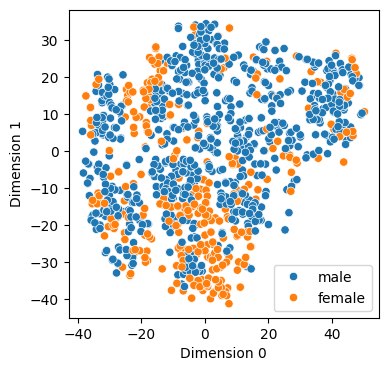

Sil. coeff:  -0.4525991929623459


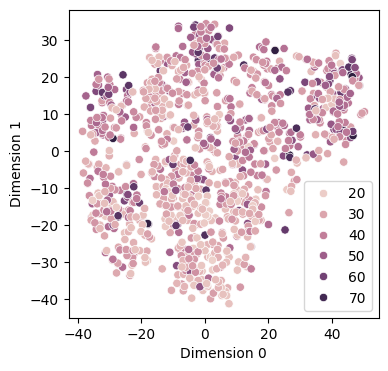

In [20]:
for f in ['prot1', 'prot2']:
    dftsne['hue'] = df[metadata[f]].values
    print('Sil. coeff: ',silhouette_score(dftsne[['Dimension 0','Dimension 1']].values, df[metadata[f]].values))
    plt.figure(figsize=(4,4))
    g = sns.scatterplot(data = dftsne, x = 'Dimension 0', y = 'Dimension 1', hue = 'hue')
    leg = g.get_legend()
    g.legend_.set_title(None)
    plt.legend()
    hpath = os.path.join(filepath,metadata['dataset_name']+'_'+metadata[f]+'_perp30_tsne.jpg')
    plt.savefig(hpath, bbox_inches='tight', dpi=1000, format = 'jpg')
    plt.show()

Taking a random sample for the datasets and then conducting the Kolmogorov Smirnov test for two-sample tests. We wish to test the null hypothesis that the two samples are drawn from the same distribution. The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical. 

In [23]:
from scipy.stats import chi2_contingency, ks_2samp, f_oneway
df, df_num, metadata, num, binarized_prot  = preprocess_datasets(dataset, path=dataset_path).preprocess_dataset()
traintest_split = True

for state in random_states:

    if len(df) > 10000:
        df_sample = df.sample(n = 10000, random_state = state)
    else:
        df_sample = df.sample(n = len(df), random_state = state)
    
    for col in df.select_dtypes('object').columns:
        df_counts = pd.DataFrame(index=df[col].unique(), columns=['True', 'Sample'])
        df_counts['True'] = df[col].value_counts()
        df_counts['Sample'] = df_sample[col].value_counts()
        ch2_test = chi2_contingency(df_counts)
        print(state, col, 'chi2 statistic', ch2_test[0].round(3), 'p:', ch2_test[1].round(3), end=' | ')
    
    for col in df.select_dtypes('float').columns:
        km_test = ks_2samp(df[col], df_sample[col])
        print(col, 'km statistic', km_test[0].round(3), 'p:', km_test[1].round(3), end=' | ')

    F, p = f_oneway(df_num, df_num.loc[df_sample.index], axis=None)
    print('ANOVA statistic:', F.round(3), 'p:', p.round(3))
    print('---')

102 Status_of_existing_checking_account chi2 statistic 0.0 p: 1.0 | 102 Credit_history chi2 statistic 0.0 p: 1.0 | 102 Purpose chi2 statistic 0.0 p: 1.0 | 102 Savings_accountbonds chi2 statistic 0.0 p: 1.0 | 102 Present_employment_since chi2 statistic 0.0 p: 1.0 | 102 Personal_status_and_sex chi2 statistic 0.0 p: 1.0 | 102 Other_debtorsguarantors chi2 statistic 0.0 p: 1.0 | 102 Property chi2 statistic 0.0 p: 1.0 | 102 Other_installment_plans chi2 statistic 0.0 p: 1.0 | 102 Housing chi2 statistic 0.0 p: 1.0 | 102 Job chi2 statistic 0.0 p: 1.0 | 102 Telephone chi2 statistic 0.0 p: 1.0 | 102 Foreign_worker chi2 statistic 0.0 p: 1.0 | Duration_in_month km statistic 0.0 p: 1.0 | Credit_amount km statistic 0.0 p: 1.0 | Installment_rate_in_percentage_of_disposable_income km statistic 0.0 p: 1.0 | Present_residence_since km statistic 0.0 p: 1.0 | Age_in_years km statistic 0.0 p: 1.0 | Number_of_existing_credits_at_this_bank km statistic 0.0 p: 1.0 | Number_of_people_being_liable_to_provide_mai